<a href="https://colab.research.google.com/github/JoseAdFer/IDAL_IA3_JoseAdell/blob/main/Titanic_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns

In [296]:
test=pd.read_csv('./test.csv')
train=pd.read_csv('./train.csv')

In [297]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [298]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [299]:
train.describe()

,Age,SibSp,Parch,Fare
count,573.000000,711.000000,711.000000,711.000000
mean,28.845986,0.542897,0.393812,31.973669
std,14.282324,1.112314,0.821998,50.468437
min,0.420000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,14.458300
75%,36.500000,1.000000,0.000000,30.847900
max,80.000000,8.000000,6.000000,512.329200


In [300]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Yes,Upper,female,33.0,1,0,90.0000,Queenstown
1,No,Lower,male,20.0,0,0,7.8542,Southampton
2,No,Middle,male,50.0,0,0,13.0000,Southampton
3,Yes,Upper,female,18.0,2,2,262.3750,Cherbourg
4,No,Middle,male,34.0,0,0,13.0000,Southampton


In [310]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [173]:
train.shape

(711, 8)

In [309]:
mean=np.mean(train.Age)
train.Age=train.Age.fillna(mean)
test.Age=test.Age.fillna(mean)

In [308]:
mean=np.mean(train.Age)
mean

28.845986038394415

In [313]:
train.Survived=train.Survived.map({'No': 0,'Yes':1})
test.Survived=test.Survived.map({'No': 0,'Yes':1})
train.Sex=train.Sex.map({'female':0,'male':1})
test.Sex=test.Sex.map({'female':0,'male':1})
train.Pclass=train.Pclass.map({'Lower':3,'Middle':2,'Upper':1})
test.Pclass=test.Pclass.map({'Lower':3,'Middle':2,'Upper':1})

In [331]:
train=pd.get_dummies(data=train, columns=['Embarked'])
test=pd.get_dummies(data=test, columns=['Embarked'])

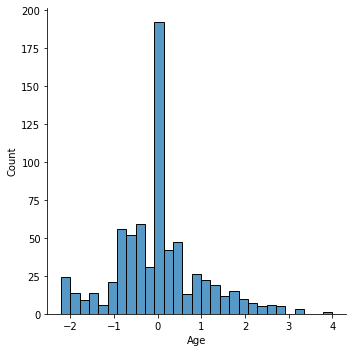

In [323]:


sns.displot(train.Age)

In [119]:
#train=train.drop(train[train.Age>=70].index)

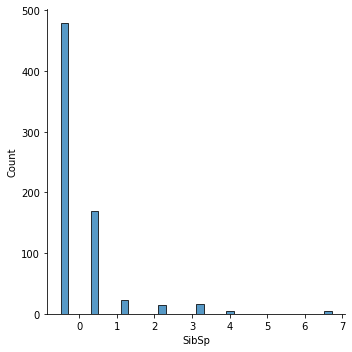

In [324]:
sns.displot(train.SibSp)

In [120]:
#train=train.drop(train[train.SibSp>=7].index)

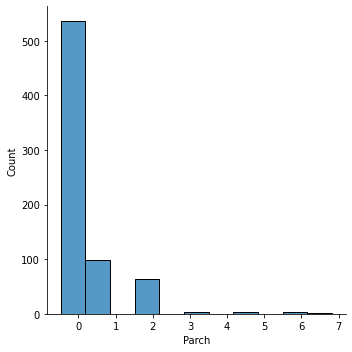

In [322]:
sns.displot(train.Parch)

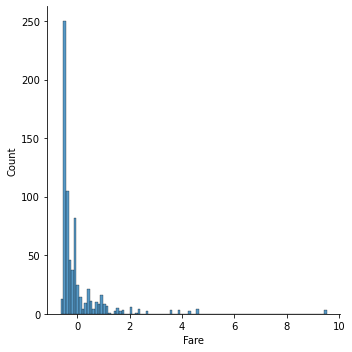

In [325]:
sns.displot(train.Fare)

In [121]:
#train=train.drop(train[train.Fare>=400].index)

In [317]:
train.shape

(711, 8)

Normalizar (Age, SibSp, Parch, Fare)

Detección Outlier

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [332]:
scaled_features = train.copy()
col_names = ['Age','SibSp','Parch','Fare']
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [333]:
train[col_names] = features
print(train)

     Survived  Pclass  ...  Embarked_Queenstown  Embarked_Southampton
0           1       1  ...                    1                     0
1           0       3  ...                    0                     1
2           0       2  ...                    0                     1
3           1       1  ...                    0                     0
4           0       2  ...                    0                     1
..        ...     ...  ...                  ...                   ...
706         0       1  ...                    0                     1
707         0       3  ...                    0                     1
708         0       2  ...                    0                     1
709         0       1  ...                    0                     1
710         0       3  ...                    0                     1

[711 rows x 10 columns]


In [334]:
print(train.SibSp)

0      0.411237
1     -0.488423
2     -0.488423
3      1.310897
4     -0.488423
         ...   
706   -0.488423
707   -0.488423
708   -0.488423
709    0.411237
710   -0.488423
Name: SibSp, Length: 711, dtype: float64


In [335]:

features_test = test[col_names]
features_test = scaler.transform(features_test.values)
test[col_names]=features_test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


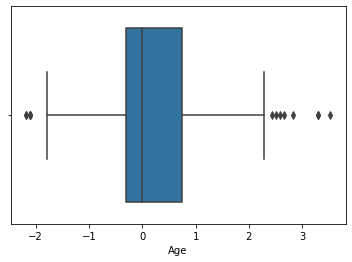

In [183]:
sns.boxplot(test.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


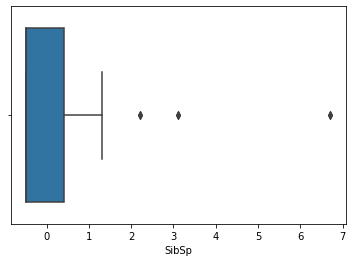

In [329]:
sns.boxplot(test.SibSp)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


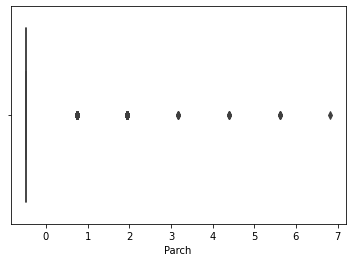

In [185]:
sns.boxplot(train.Parch)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


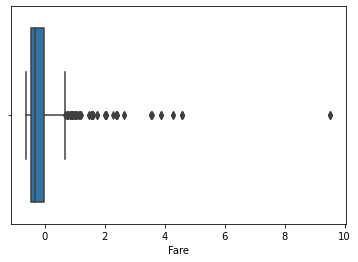

In [186]:
sns.boxplot(train.Fare)

In [337]:
X_train=train.drop(['Survived'],axis=1)


In [339]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,0,0.324269,0.411237,-0.479428,1.150564,0,1,0
1,3,1,-0.690533,-0.488423,-0.479428,-0.478248,0,0,1
2,2,1,1.651318,-0.488423,-0.479428,-0.376216,0,0,1
3,1,0,-0.846656,1.310897,1.955382,4.568470,1,0,0
4,2,1,0.402331,-0.488423,-0.479428,-0.376216,0,0,1


In [340]:
y_train = train.Survived

In [341]:
X_test=test.drop(['Survived'],axis=1)
y_test = test.Survived

In [342]:
X_test.shape

(179, 9)

In [356]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,0,0.324269,0.411237,-0.479428,1.150564,0,1,0
1,3,1,-0.690533,-0.488423,-0.479428,-0.478248,0,0,1
2,2,1,1.651318,-0.488423,-0.479428,-0.376216,0,0,1
3,1,0,-0.846656,1.310897,1.955382,4.568470,1,0,0
4,2,1,0.402331,-0.488423,-0.479428,-0.376216,0,0,1


# **Modelo**

In [343]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
tf.random.set_seed(42)

In [470]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(9,),activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [471]:

lr = .001
batch_size = 150
n_epochs = 150
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


In [472]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# **Entrenamiento**

In [473]:
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                validation_data=(X_test, y_test))

Epoch 1/150
5/5 [==============================] - 1s 52ms/step - loss: 0.6709 - accuracy: 0.6315 - val_loss: 0.6652 - val_accuracy: 0.6145
Epoch 2/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6665 - accuracy: 0.6470 - val_loss: 0.6610 - val_accuracy: 0.6145
Epoch 3/150
5/5 [==============================] - 0s 12ms/step - loss: 0.6624 - accuracy: 0.6498 - val_loss: 0.6569 - val_accuracy: 0.6201
Epoch 4/150
5/5 [==============================] - 0s 10ms/step - loss: 0.6580 - accuracy: 0.6456 - val_loss: 0.6528 - val_accuracy: 0.6257
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6536 - accuracy: 0.6442 - val_loss: 0.6488 - val_accuracy: 0.6313
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.6495 - accuracy: 0.6470 - val_loss: 0.6448 - val_accuracy: 0.6313
Epoch 7/150
5/5 [==============================] - 0s 11ms/step - loss: 0.6456 - accuracy: 0.6470 - val_loss: 0.6408 - val_accuracy: 0.6257
Epoch 8/150
5/5 [======

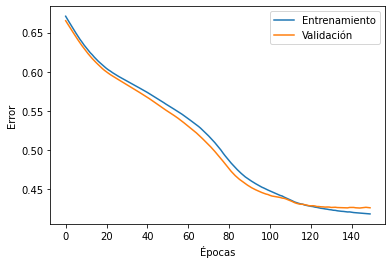

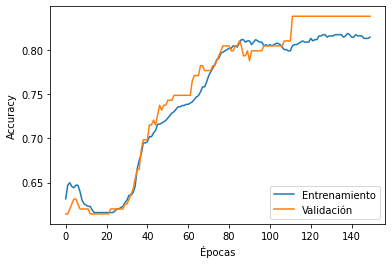

In [474]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)